<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/1/MLP_Basics_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

from matplotlib import rcParams
# rcParams['figure.figsize'] = 15,7
plt.rc('figure', figsize=(12,7) )         # Image size

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-759ebfe40873>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


In [2]:
'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 3 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 10 )

plt.rc('figure', figsize=(10,5) )         # Image size

In [3]:
def grid(x1, x2, off_set = .1, n_points = 100):
    ## d s show the range in the two varible.
    d1 = x1.max() - x1.min()
    d2 = x2.max() - x2.min()

    x1_min, x1_max = x1.min() - off_set * d1 , x1.max() + off_set * d1
    x2_min, x2_max = x2.min() - off_set * d2 , x2.max() + off_set * d2

    ## This function from numpy gives a list of coordinates that are the points on the grid.
    x, y = np.meshgrid(np.arange(x1_min, x1_max , d1/n_points), np.arange(x2_min, x2_max , d2/n_points) )

    return x , y

In [4]:
import io, requests

#####BBR######
## This data is collected from galileo.phys.virginia.edu/classes/252
url = "https://github.com/sraeisi/MachineLearning_Physics/blob/master/Data/bbr.csv?raw=true"
data_bbr = pd.read_csv(url)

########Particles#######
# Data taken from https://www.kaggle.com/naharrison/particle-identification-from-detector-responses

url = 'https://www.dropbox.com/s/66dbhxl93y41coe/particle-identification-from-detector-responses.zip?dl=1'
s=requests.get(url, stream=True).content
data_prtcl=pd.read_csv(io.BytesIO(s) , compression='zip' )
data_prtcl = data_prtcl.sample(1000)
data_prtcl.id = data_prtcl.id.astype('category').cat.codes


# data_prtcl.head()

########GS energy#######
'''
We need to first import the data. I took the data from the following kaggle dataset.

https://www.kaggle.com/burakhmmtgl/energy-molecule

These are the ground state energies of some molecules based on their different
chemical bounds.
'''
url = 'https://www.dropbox.com/s/das9t6vwp7t4b7f/roboBohr.csv.zip?dl=1'
s=requests.get(url, stream=True).content
data_gse=pd.read_csv(io.BytesIO(s) , compression='zip' , index_col=0)


## Classification vs Regression

Which one is a regression problem and which one is a classificatin problem?

In [ ]:
data_bbr.head()

,0,T,0.1,T/2,0.2
0,8.818200e+10,2.980000e-23,3.000000e-23,1.480000e-23,1.500000e-23
1,1.760000e+11,1.180000e-22,1.200000e-22,5.830000e-23,6.000000e-23
2,2.650000e+11,2.640000e-22,2.700000e-22,1.290000e-22,1.350000e-22
3,3.530000e+11,4.670000e-22,4.800000e-22,2.270000e-22,2.400000e-22
4,4.410000e+11,7.240000e-22,7.490000e-22,3.490000e-22,3.750000e-22


In [ ]:
data_prtcl.head()

,id,p,theta,beta,nphe,ein,eout
1081325,0,2.986040,0.171563,0.999018,0,0.031632,0.050904
2709670,0,0.568093,0.412772,0.962720,0,0.000000,0.000000
4586889,1,1.776460,0.309455,0.966251,0,0.027192,0.053239
921344,0,0.789960,0.553455,0.994653,0,0.036530,0.072786
2118657,2,3.036850,0.292498,0.964245,0,0.042664,0.064500


In [ ]:
data_gse.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,12.342823,12.335925,12.328055,12.284265,12.269844,12.247357,10.557967,10.473721,9.225262,8.448526,7.611145,7.610874,7.580510,7.579386,7.576929,7.536001,7.517317,7.462578,7.459865,7.456214,7.447581,7.443458,7.423496,7.345785,7.323741,7.247088,7.230886,6.662523,6.286251,6.134338,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,15.202985,14.800045,12.855629,12.728858,12.618058,12.589962,12.557323,12.074893,10.607138,10.572061,10.464293,9.816674,9.456914,9.455816,8.865704,8.104048,8.006855,7.968817,7.946644,7.932943,7.922656,7.888724,7.885692,7.783220,7.637477,7.636586,7.631457,7.336591,7.127698,6.974135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,7.607776,7.550253,7.446675,7.398848,7.381532,7.355045,7.321944,6.625986,6.116315,6.106397,6.098066,5.989868,5.731750,5.700963,5.371527,5.008911,4.894453,4.826545,4.352232,4.270598,2.902330,2.902220,2.901834,2.901089,2.900168,2.900151,2.899983,2.898772,2.898551,2.897620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,12.420665,12.410312,12.346845,12.175480,12.098758,10.612802,10.610273,10.606738,10.606702,10.433290,8.694957,8.421582,8.103569,8.103345,7.595619,7.566897,7.555411,7.413109,7.403199,7.185256,6.915425,6.198245,6.191266,6.181797,6.152544,5.252689,5.244354,5.176740,5.176314,5.175577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,10.485270,8.595823,8.103880,8.103567,7.975189,7.546413,7.503300,6.803380,6.738768,5.169492,5.161869,5.145972,4.924911,4.899245,4.534996,4.486310,3.897466,3.081523,2.957823,2.903069,2.902178,2.900610,2.900542,2.900306,2.899368,2.899113,2.897739,2.896793,2.896063,2.895051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


# Linear Models

## Regression

The slope is -4.40 and the intercept is -1.63.



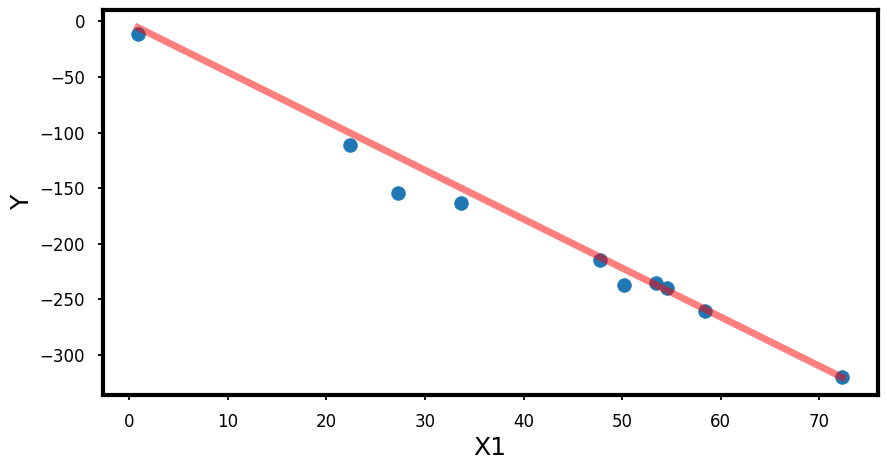

In [5]:
w, b = np.random.uniform(-5,5, 2)
print(f'The slope is {w:.2f} and the intercept is {b:.2f}.\n')

ns = 10

noise = 10

X_synth = np.sort(np.random.uniform(0,100,ns))
Y_synth = w*X_synth + b + np.random.normal(0,noise, ns)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='X1', ylabel='Y')
plt.scatter(X_synth, Y_synth)
plt.plot(X_synth, w*X_synth + b , c='r', alpha=.5)
plt.show()

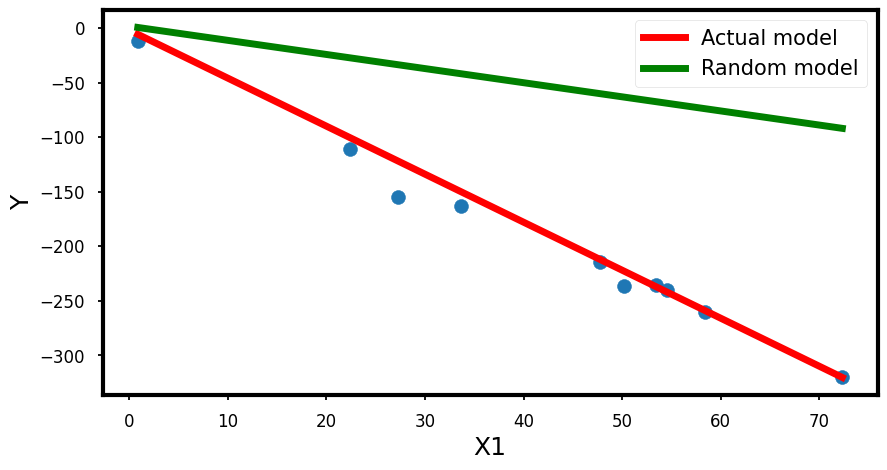

In [6]:
# Let's try some random linear model
def test_model(w_list, bias = 0):
    '''
    This model returns a function f = w.X.
    Note that the assumption is
    X is [n_s, n_f ]
    w is [n_f] (is a vector).
    '''
    n_f = len(w_list)
    def f(x):
        return x.reshape(-1,n_f) @ w_list + bias
    return f

w_random = np.random.uniform(-5,5, (1,1))
b_random = np.random.uniform(-5,5, 1)
model = test_model(w_random, b_random)



fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, xlabel='X1', ylabel='Y')
plt.scatter(X_synth, Y_synth)
plt.plot(X_synth, w*X_synth + b , c='r', label= 'Actual model')
plt.plot(X_synth, model(X_synth) , c='g', label= 'Random model')
plt.legend(loc=0)
plt.show()

In [ ]:
## Is this a good model?
## Write a function that characterizes the quality of the fit.

def reg_quality(Y,Y_pred):
  # Fill this up

  return 0

In [ ]:
'''
Find a random linear fit for the GSE data.

How would you optimize the fit?
'''



'\nFind a random linear fit for the GSE data. \n\nHow would you optimize the fit?\n'

In [ ]:
'''
Find a random linear fit for the BBR data.

Does it seem right?
'''


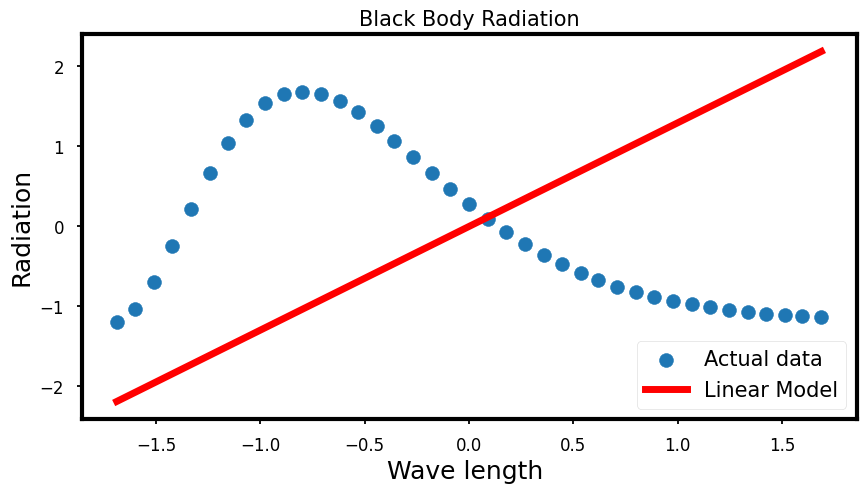

In [7]:
from sklearn.preprocessing import scale
n_s_rate = 20

X_bbr = scale(data_bbr['0'][::n_s_rate])
Y_bbr = scale(data_bbr['T'][::n_s_rate])
model = test_model(-w_random, 0)

n_s_rate=1

x_label = 'Wave length '
y_label = 'Radiation'
plt_title = 'Black Body Radiation'
fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)
ax.scatter(X_bbr, Y_bbr, label = 'Actual data')
ax.plot(X_bbr, model(X_bbr), c='r', label='Linear Model')

ax.legend()
plt.show()

### Using sklearn

In [8]:
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor


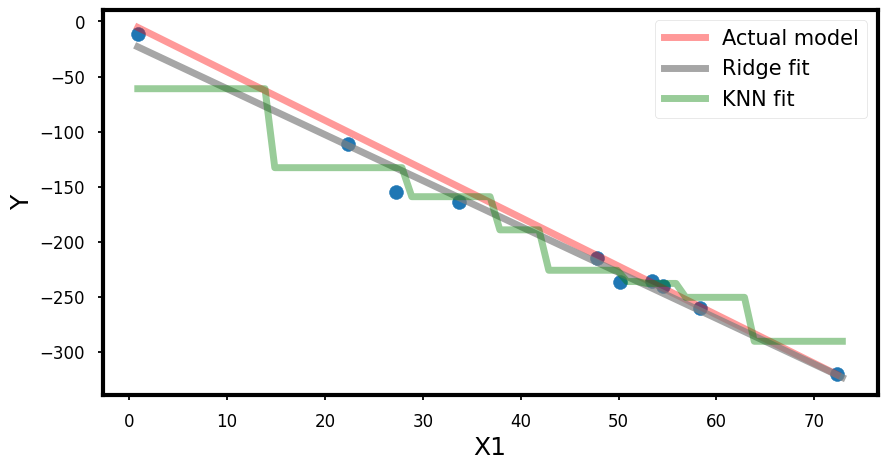

In [9]:
x_range = np.arange(X_synth[0], X_synth[-1]+1)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, xlabel='X1', ylabel='Y')
plt.scatter(X_synth, Y_synth)
plt.plot(X_synth, w*X_synth + b , c='r', label= 'Actual model', alpha=.4)


rg = Ridge()
rg.fit( X_synth.reshape(-1,1), Y_synth)  ## Training  ## X: ns*nf
plt.plot(x_range, rg.predict(x_range.reshape(-1,1) ) , c='gray', label='Ridge fit', alpha=.7)


rg = KNeighborsRegressor(n_neighbors=2).fit(X_synth.reshape(-1,1), Y_synth)
plt.plot(x_range, rg.predict(x_range.reshape(-1,1) ) , c='g', label='KNN fit', alpha=.4)

# plt.ylim(0,180)
plt.legend(loc=0)
plt.show()


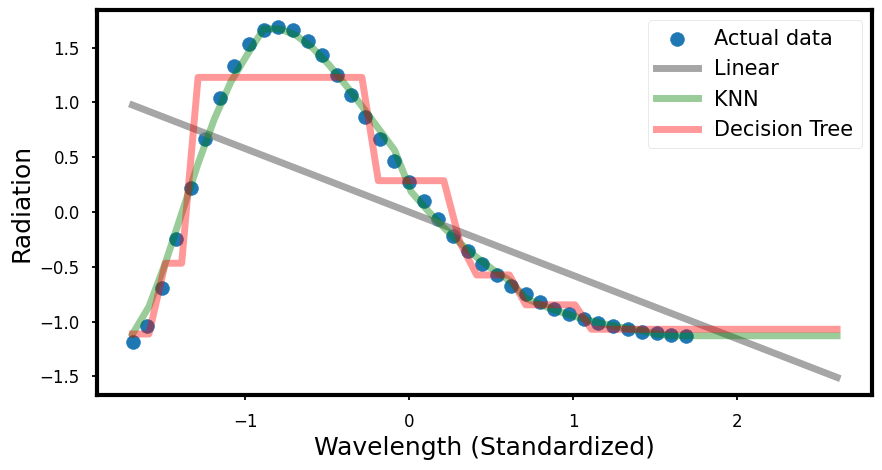

In [10]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

x_range = np.arange(X_bbr.min(), X_bbr.max()+1,.1)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, xlabel='Wavelength (Standardized)', ylabel='Radiation')
plt.scatter(X_bbr[:], Y_bbr[:], label='Actual data')
# plt.plot(X_bbr, w*X_bbr + b , c='r', label= 'Actual model', alpha=.4)


rg = Ridge()
rg.fit( X_bbr.reshape(-1,1), Y_bbr )  ## Training  ## X: ns*nf
plt.plot(x_range, rg.predict(x_range.reshape(-1,1) ) , c='gray', label='Linear', alpha=.7)


rg = KNeighborsRegressor(n_neighbors=2).fit(X_bbr.reshape(-1,1), Y_bbr)
plt.plot(x_range, rg.predict(x_range.reshape(-1,1) ) , c='g', label='KNN', alpha=.4)

# ------------------------------
rg = DecisionTreeRegressor(max_depth=3 )
rg.fit(X_bbr.reshape(-1,1), Y_bbr)
plt.plot(x_range, rg.predict(x_range.reshape(-1,1) ) , c='r', label='Decision Tree', alpha=.4)


# ----------------------------
# plt.ylim(0,180)
plt.legend(loc=0)
plt.savefig('2-Model-Reg-exmpl.pdf')
plt.show()


## Classification

### The concept

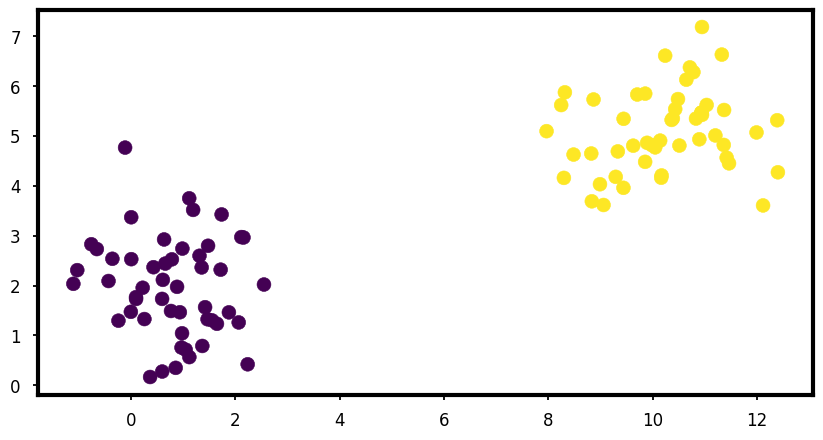

In [11]:
'''
Just as we did for clustering, we generate a set points in 2D but
this time we are going to use the labels, Y for training a classifer.
'''
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=100,centers=[[1,2], [10,5]])

plt.scatter(*X.T, c=Y)

What does a CLF do and how does it work?

We are looking for f(X) such that for class 1, f(X) > 0 and for class 2, f(X) < 0.

Let's try some models


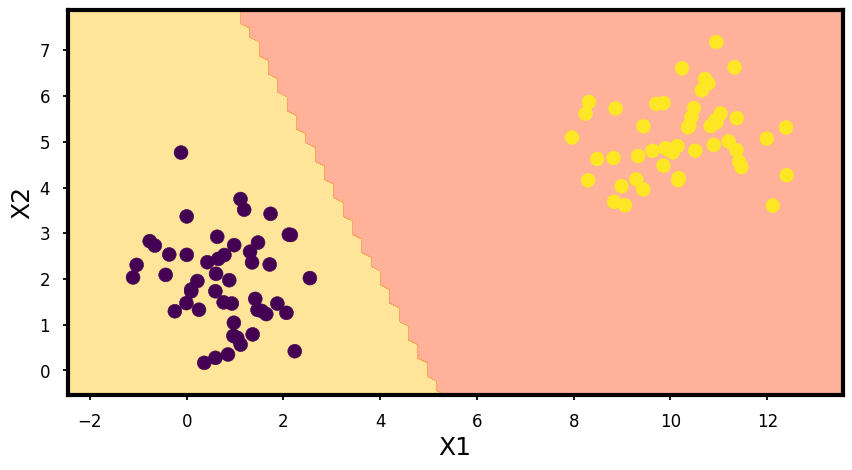

In [12]:
def test_model(w_list, bias = 0):
    '''
    This model returns a function f = w.X.
    Note that the assumption is
    X is [n_s, n_f = 2]
    w is [n_f] (is a vector).
    '''
    def f(x):
        return np.dot(x,w_list) + bias
    return f

# w_random = np.random.uniform(-1,1,2)
model = test_model(w_random)

model = test_model([2, 1],bias = -10)

x1_list, x2_list = grid(X[:,0], X[:,1], n_points=70)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
Y_grid = model( X_grid ).reshape(x1_list.shape ) > 0


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, xlabel='X1', ylabel='X2')

ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.autumn_r)
ax.scatter(*X.T, c=Y)
# plt.xlim(-3,13)
# plt.ylim(-1,8)
plt.show()

In [13]:
from matplotlib.widgets import Slider, Button, RadioButtons
from ipywidgets import interact, IntSlider, FloatSlider



def test_model_plot(a, b):
    w_list = [1,a]
    clf = test_model(w_list, b  )
    Y_grid = clf( X_grid ).reshape(x1_list.shape ) > 0

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(*X.T, c=Y)
    ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.autumn)
    plt.show()

    return None

interact(test_model_plot, a=FloatSlider(min=-5, max=5, step=.5, value=2), b=FloatSlider(min=-10, max=10, step=.5, value=2))

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.test_model_plot(a, b)>

**Question: Find a way to optimize this!**

Write a function that given the X and Y, finds a linear classification for this problem.

### Classification with sklearn

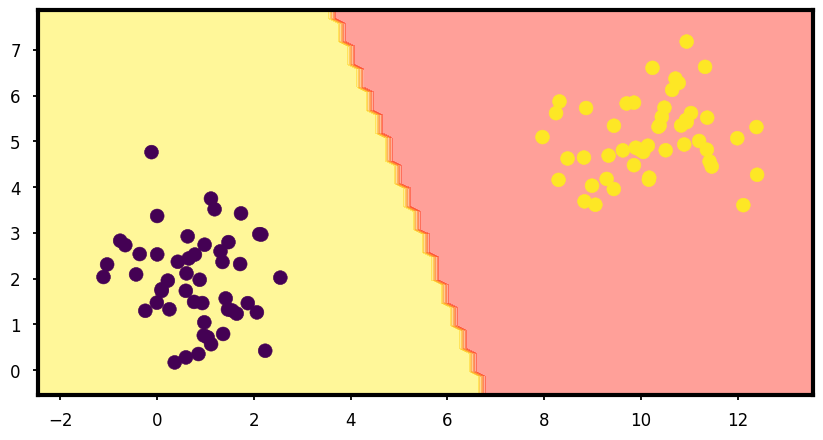

In [14]:

'''
We can use sklearn to implement some of the well-known classification algorithms.
'''

from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.svm import  SVC, SVR

# clf = SGDClassifier()
clf = SVC(kernel='linear' )
clf.fit(X, Y)

x1_list, x2_list = grid(X[:,0], X[:,1], n_points=70)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T

Y_grid = clf.predict( X_grid ).reshape(x1_list.shape )

fig = plt.figure()
ax = fig.add_subplot(111)

ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.autumn_r)
ax.scatter(*X.T, c=Y)
plt.show()

In [ ]:
'''
Do the same for the data_prtcl
'''

In [ ]:
'''
For the BBR data, train a polynomial model using what you learned today.
Hint: use polynomial features to generate polynomial features.
Hint: It might help to first scale both X and Y into a range of [0-1].
'''
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Models

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor, Ridge
from sklearn.pipeline import Pipeline

## Our version for polynomial features generator
## There is no cross-terms
def poly_features(x, deg):
    return np.hstack([x**(deg-d) for d in np.arange(deg+1) ])


In [16]:
x_rg = np.arange(0,1,.1).reshape(-1,1)

poly_features(x_rg, 2 )#.shape()

array([[0.  , 0.  , 1.  ],
       [0.01, 0.1 , 1.  ],
       [0.04, 0.2 , 1.  ],
       [0.09, 0.3 , 1.  ],
       [0.16, 0.4 , 1.  ],
       [0.25, 0.5 , 1.  ],
       [0.36, 0.6 , 1.  ],
       [0.49, 0.7 , 1.  ],
       [0.64, 0.8 , 1.  ],
       [0.81, 0.9 , 1.  ]])

## Regression

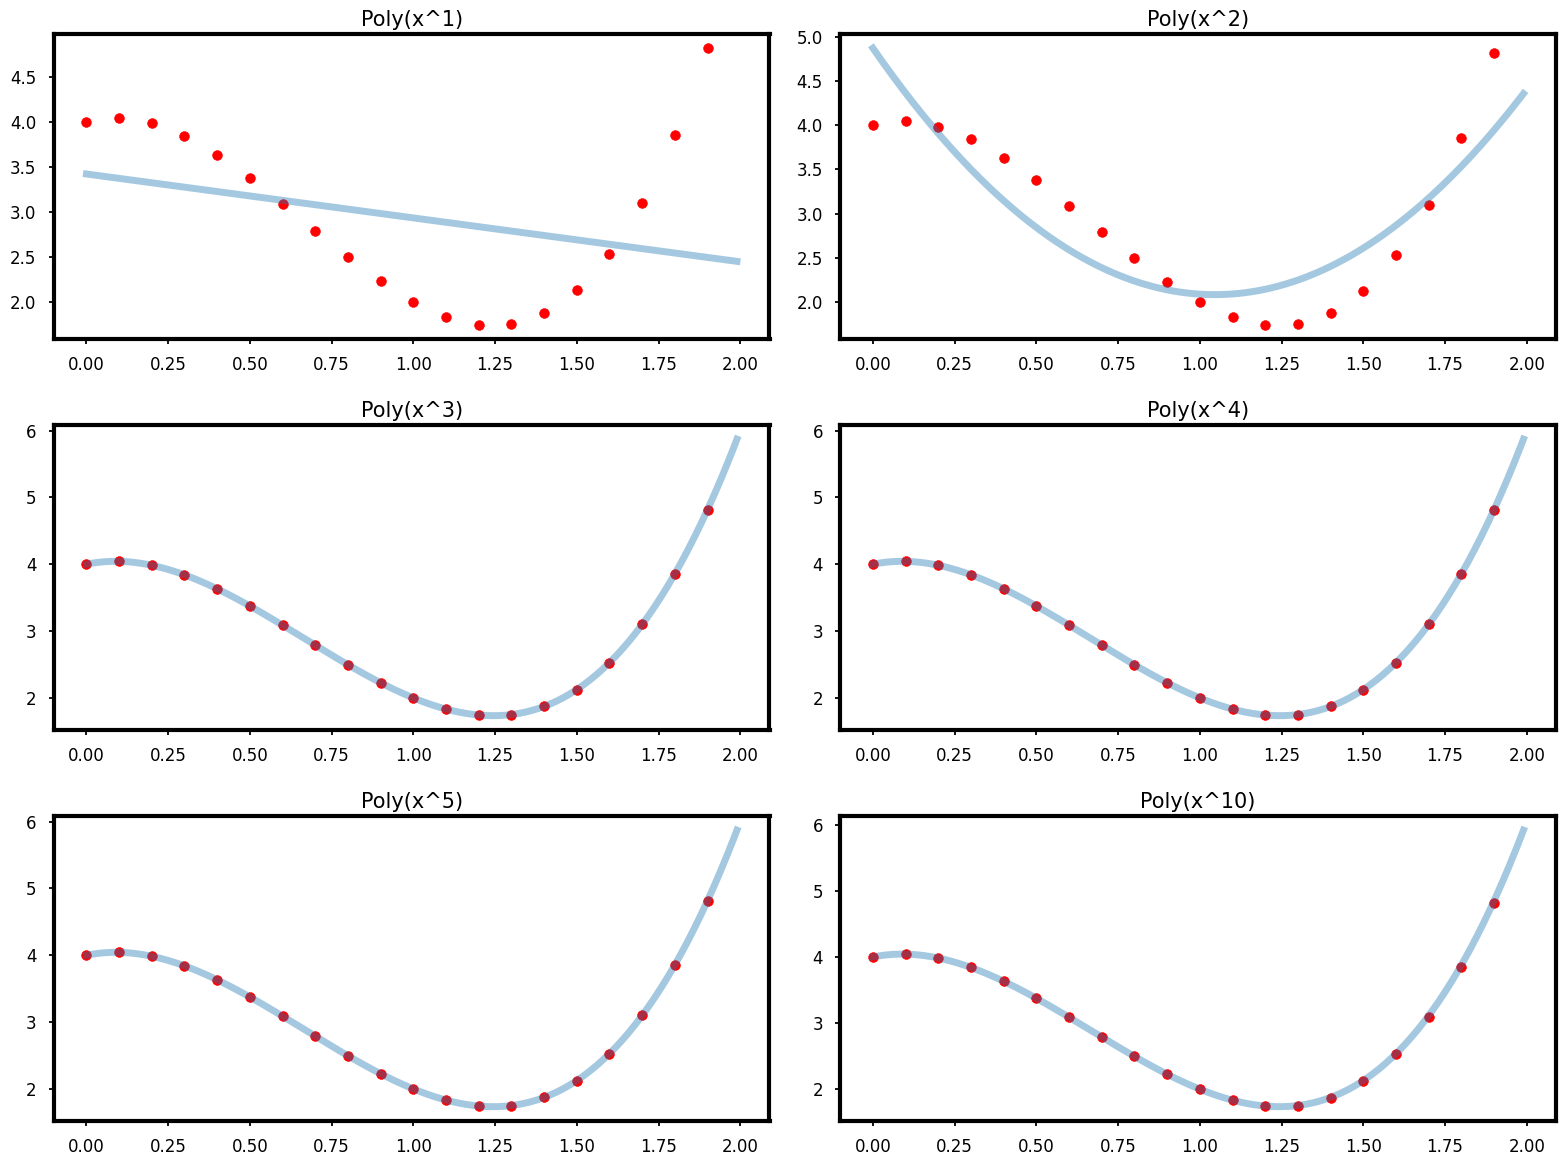

In [18]:
'''
Now let's try higher orders.
How high can ve go.
'''
w_real = np.array([3,-6,1,4])

x_rg = np.arange(0,2,.1).reshape(-1,1)
y_rg = np.dot(poly_features(x_rg, len(w_real)-1 ), w_real).reshape(-1,1)


# x_rg = np.hstack([x_rg, x_rg**0])

# for the plot
x_range = np.arange(0,2,.01).reshape(-1,1)

fig = plt.figure(figsize=(16,12))

deg_list = [1,2,3,4, 5, 10]
ind = 0
for deg in deg_list:
    ind +=1
    ## Make the X matrix with powers of the x
    x_rg_in = poly_features(x_rg, deg)

    ## Construct m as X^T.X
    m = np.dot(x_rg_in.T,x_rg_in)

    ## This gives the w
    w = np.dot(np.linalg.inv(m),np.dot(x_rg_in.T, y_rg))
#     print(deg, w.reshape(-1))


    ## Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)

    ax = fig.add_subplot(3, 2, ind ,  title = f'Poly(x^{deg})')
    ax.scatter(x_rg, y_rg, s = 50, c = 'r')
    ax.plot(x_range, y_rg_list, alpha=.4)


plt.tight_layout()
plt.show()

[ 3 -6  1  4]


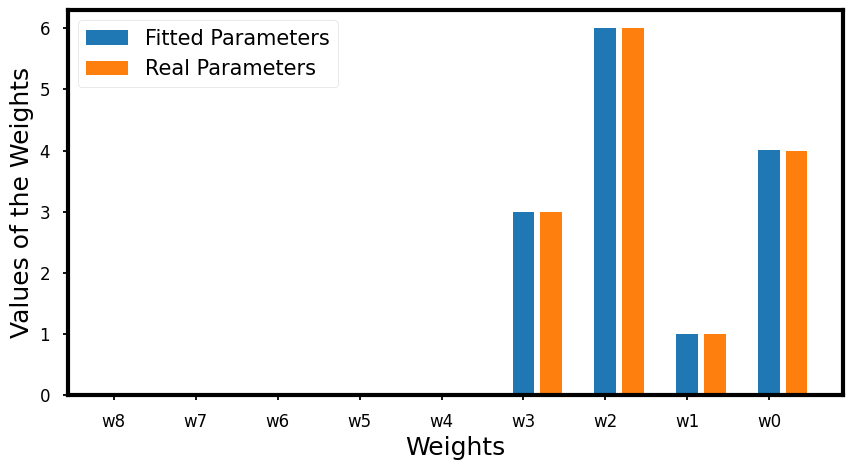

In [19]:
degr = 8
x_rg_in = poly_features(x_rg, degr)

## Construct m as X^T.X
m = np.dot(x_rg_in.T,x_rg_in)

## This gives the w
w = np.dot(np.linalg.inv(m),np.dot(x_rg_in.T, y_rg))
#     print(deg, w.reshape(-1))


## Add the plot
# y_rg_list = np.dot(poly_features(x_range, deg), w)
print(w_real)
# w.shape

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Weights', ylabel = 'Values of the Weights')
plt.bar( 3*np.arange(degr+1),  np.abs(w.reshape(-1)), label='Fitted Parameters')
plt.bar( 3*np.arange(len(w_real))+1 + 3*(degr - len(w_real)+1 ), np.abs( w_real), label='Real Parameters')
plt.xticks( 3*np.arange(degr+1) , labels= [f'w{i}' for i in np.arange(degr, -1, -1)])
# plt.yscale('log')
plt.legend(loc=0)
plt.show()


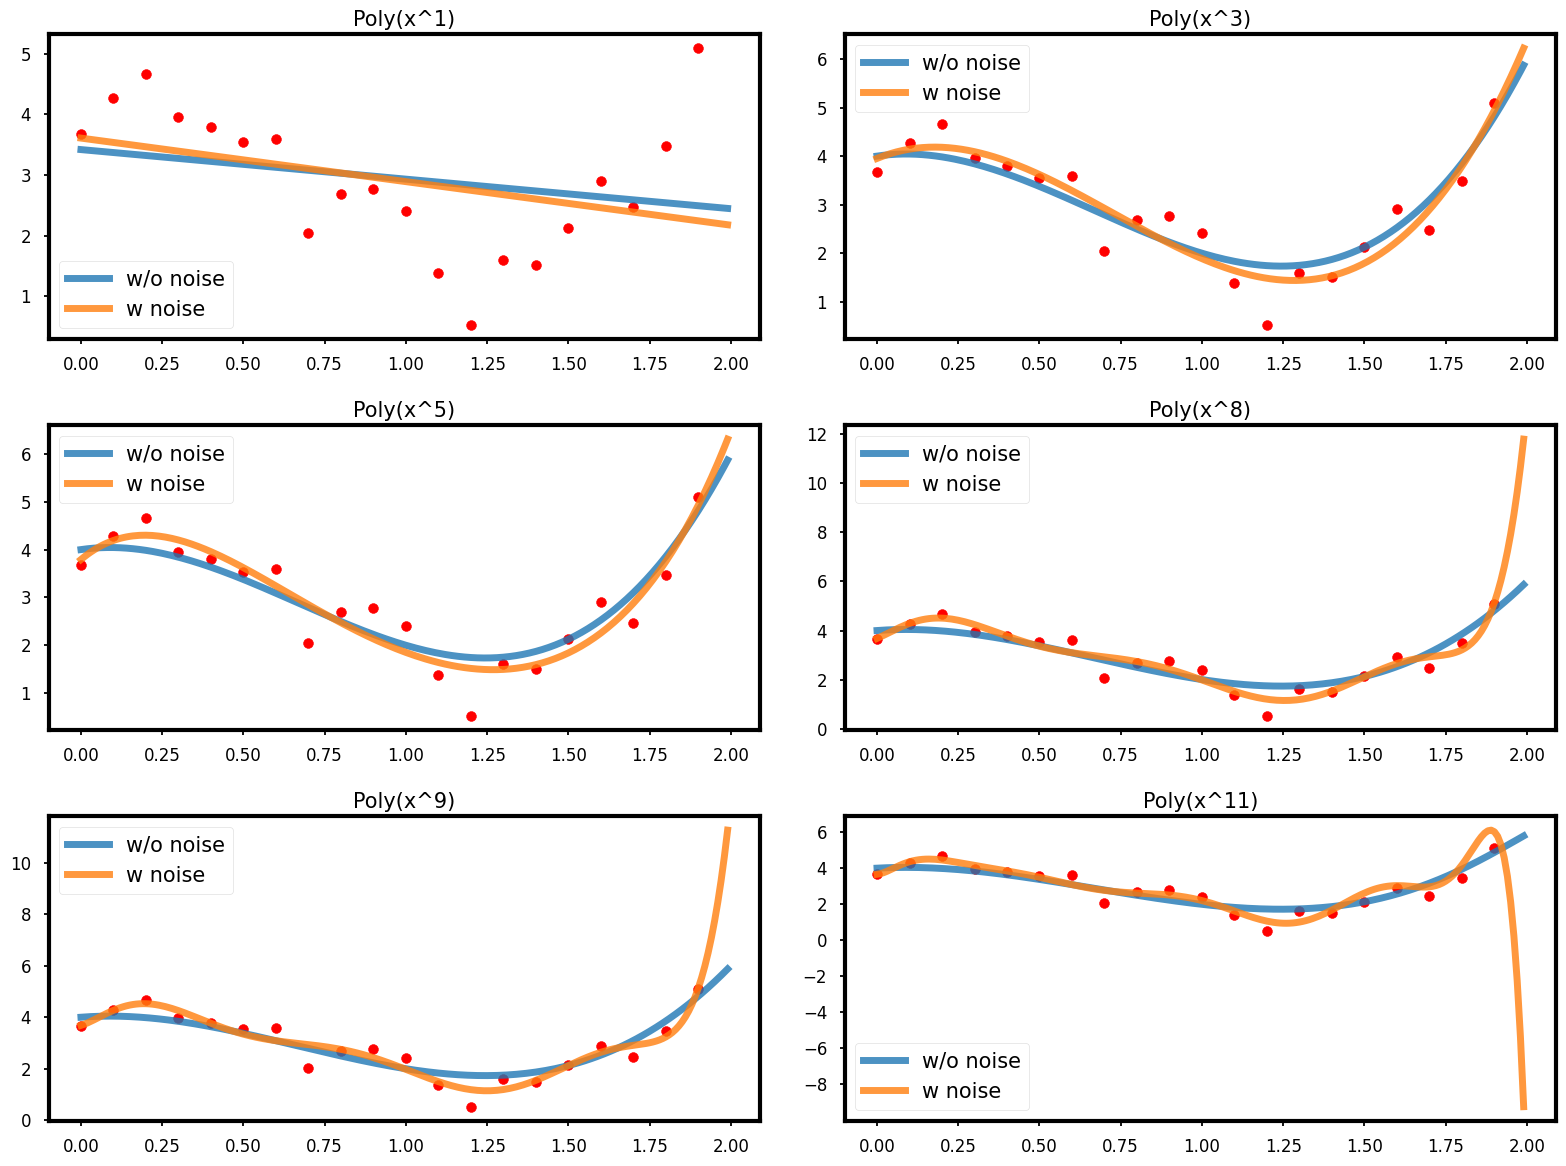

In [50]:
'''
Now let's try this with noise.
'''
w_real = np.array([3,-6,1,4])

x_rg = np.arange(0,2,.1).reshape(-1,1)
noise = np.random.normal( size=len(x_rg) , scale = .5).reshape(-1,1)
y_rg = np.dot(poly_features(x_rg, len(w_real)-1 ), w_real).reshape(-1,1)
y_rg_noisy = np.dot(poly_features(x_rg, len(w_real)-1 ), w_real).reshape(-1,1)+ noise


# x_rg = np.hstack([x_rg, x_rg**0])

# for the plot
x_range = np.arange(0,2,.01).reshape(-1,1)

rg = Ridge()
fig = plt.figure(figsize=(16,12))

deg_list = [1,3,5,8, 9, 11]
ind = 0
for deg in deg_list:
    ind +=1
    ## Make the X matrix with powers of the x
    x_rg_in = poly_features(x_rg, deg)

    ## Construct m as X^T.X
    m = np.dot(x_rg_in.T,x_rg_in)

    ## noiseless w
    w = np.dot(np.linalg.inv(m),np.dot(x_rg_in.T, y_rg))

    ## noiselsess predictions
    y_rg_list = np.dot(poly_features(x_range, deg), w)


    ## Noisy w
    w = np.dot(np.linalg.inv(m),np.dot(x_rg_in.T, y_rg_noisy))

    ## noisy predictions
    y_noisy_rg_list = np.dot(poly_features(x_range, deg), w)


    ## Add the plot
    ax = fig.add_subplot(3, 2, ind ,  title = f'Poly(x^{deg})')
    ax.scatter(x_rg, y_rg_noisy, s = 50, c = 'r')

    ## Training the model: w/o noise
    rg.fit(x_rg_in, y_rg)
    ax.plot(x_range, y_rg_list , alpha=.8, label = 'w/o noise')

    # rg.fit(x_rg_in, y_rg_noisy)
    ax.plot(x_range, y_noisy_rg_list , alpha=.8, label = 'w noise')
    plt.legend(loc=0)


plt.tight_layout()
plt.show()

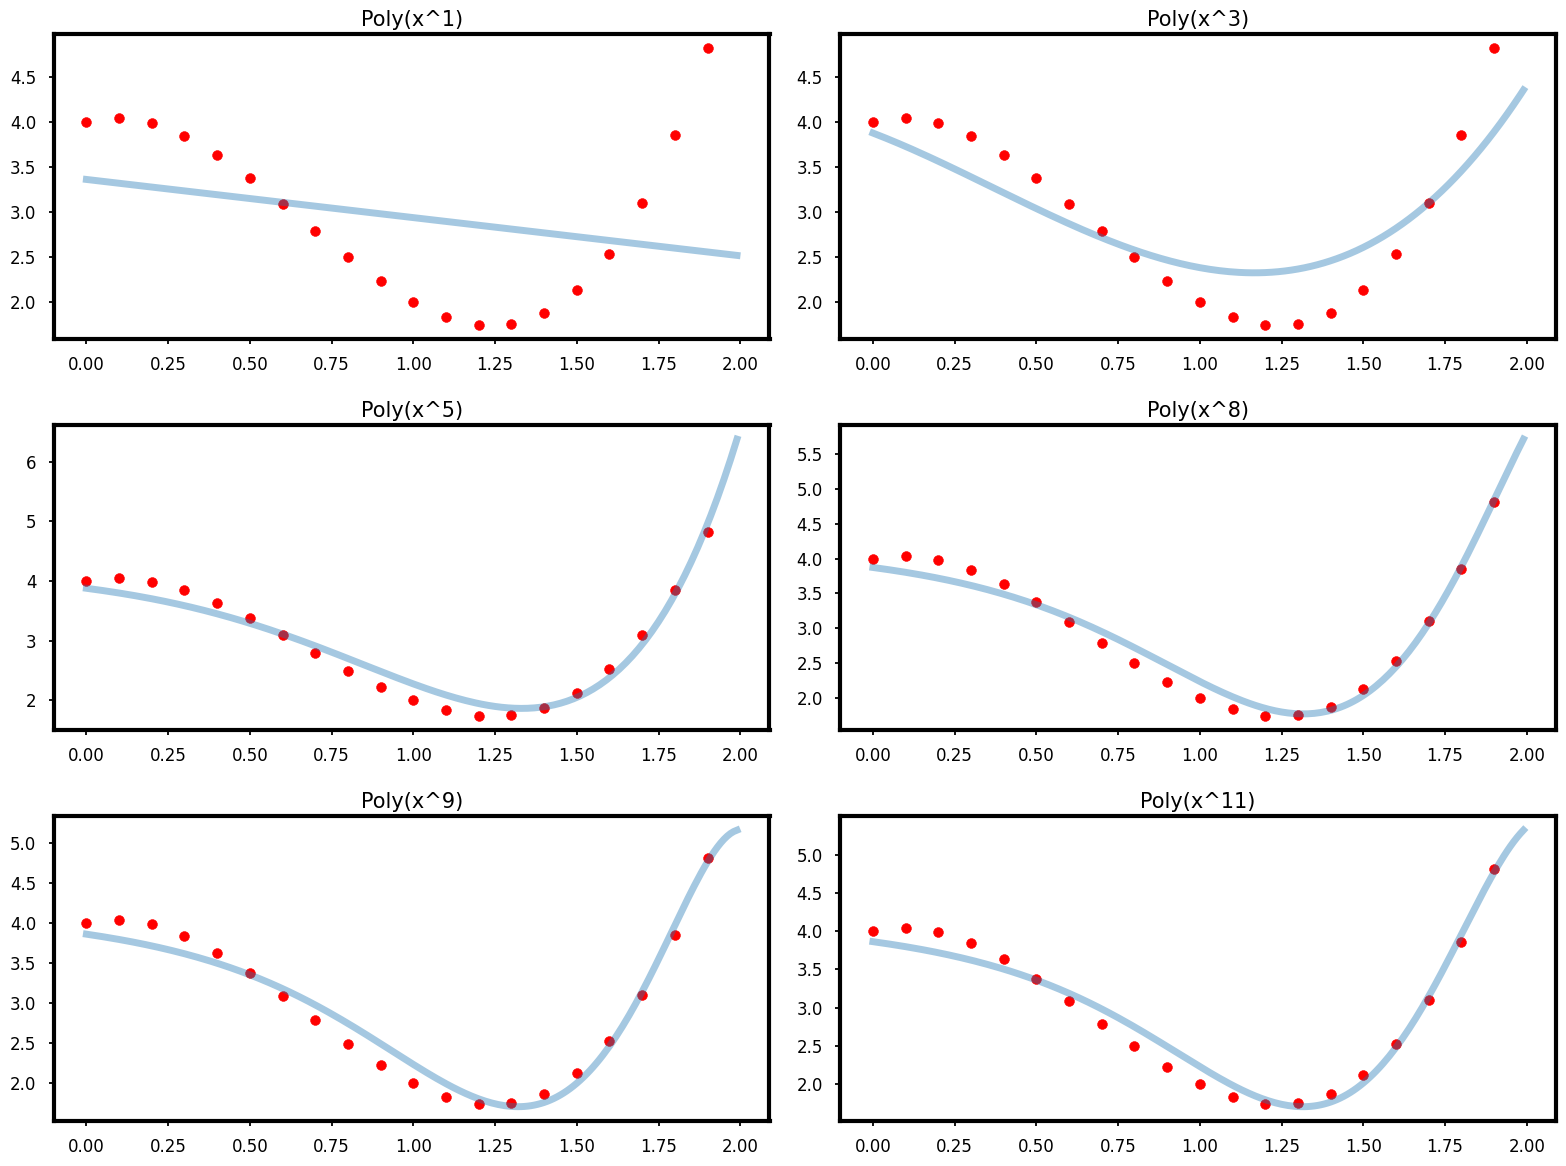

In [33]:
'''
Now let's try higher orders.
How high can ve go.
'''
w_real = np.array([3,-6,1,4])

x_rg = np.arange(0,2,.1).reshape(-1,1)
y_rg = np.dot(poly_features(x_rg, len(w_real)-1 ), w_real).reshape(-1,1)


# x_rg = np.hstack([x_rg, x_rg**0])

# for the plot
x_range = np.arange(0,2,.01).reshape(-1,1)

rg = Ridge()
fig = plt.figure(figsize=(16,12))

deg_list = [1,3,5,8, 9, 11]
ind = 0
for deg in deg_list:
    ind +=1
    ## Make the X matrix with powers of the x
    x_rg_in = poly_features(x_rg, deg)

    ## Training the model
    rg.fit(x_rg_in, y_rg)

    ## Add the plot
    ax = fig.add_subplot(3, 2, ind ,  title = f'Poly(x^{deg})')
    ax.scatter(x_rg, y_rg, s = 50, c = 'r')
    ax.plot(x_range, rg.predict(poly_features(x_range, deg)) , alpha=.4)


plt.tight_layout()
plt.show()

In [ ]:
'''
Quantify the performance of the fit in each case.
'''

## Classification

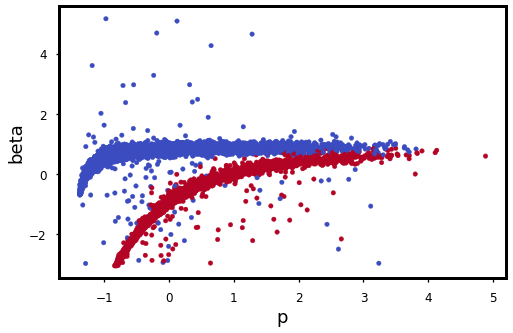

In [ ]:
url = 'https://raw.githubusercontent.com/sraeisi/Machine_Learning_Physics_Winter20/master/Lec1/particle_mini.npz'
s=requests.get(url, stream=True).content
data=np.load(io.BytesIO(s) )


## If want to run locally
# data= np.load('particle_mini.npz')

X, Y = data['X'], data['Y']

from sklearn.preprocessing import scale
X = scale(X)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, xlabel = 'p', ylabel='beta')
ax.scatter(X[:,0], X[:,1], c= Y , cmap=plt.cm.coolwarm, s=20)

plt.show()

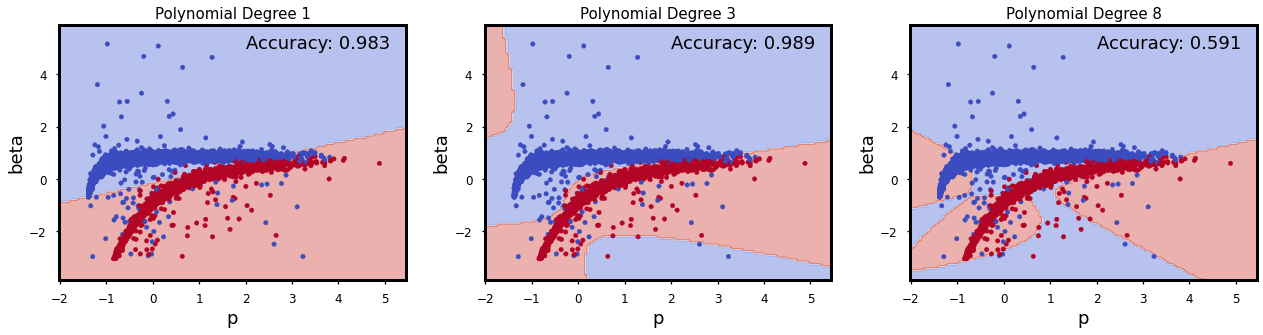

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDClassifier


transformer_dict = {'Polynomial Degree 1' : PolynomialFeatures(degree=1).fit(X),
           'Polynomial Degree 3' : PolynomialFeatures(degree=3).fit(X),
           'Polynomial Degree 8' : PolynomialFeatures(degree=8).fit(X)}


x1_list, x2_list = grid(X[:,0], X[:,1], n_points=100)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T


x_label = 'p'
y_label = 'beta'

fig = plt.figure(figsize=(18,5))
for clf in list(transformer_dict.keys())[:]:
    ax = fig.add_subplot(1, 3, list(transformer_dict.keys()).index(clf)+1 , xlabel = x_label, ylabel=y_label, title = clf)

    transformer = transformer_dict[clf]

    clf = SGDClassifier( random_state=0, n_jobs=-1 ).fit( transformer.transform(X) , Y )

    Y_grid = clf.predict( transformer.transform( X_grid )).reshape(x1_list.shape )

    ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
    ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)
    ax.text(2, 5, f'Accuracy: {np.round( clf.score(transformer.transform(X) , Y),3)}')


plt.tight_layout()

plt.show()

## Pipeline

We can/should put all together and sklearn provides a nice tool to this.

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
clf_pipeline= Pipeline([('p_transformer', PolynomialFeatures(degree = 3)), ('clf', SGDClassifier())])
clf_pipeline.fit(X,Y)

Pipeline(memory=None,
         steps=[('p_transformer',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

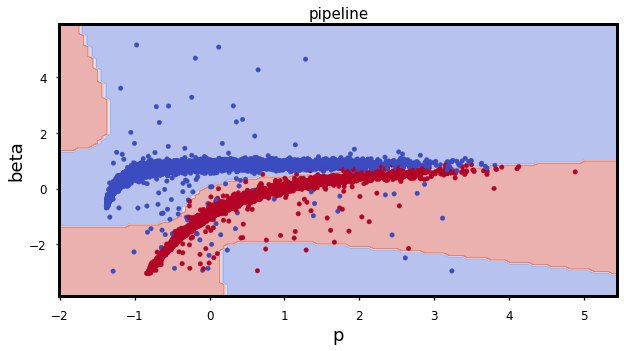

In [ ]:
x1_list, x2_list = grid(X[:,0], X[:,1], n_points=100)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1 , xlabel = 'p', ylabel='beta', title = 'pipeline')
Y_grid = clf_pipeline.predict( X_grid ).reshape(x1_list.shape )

ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)
plt.show()

The acc. on training set is 0.98.

The acc. on test set is 0.98.



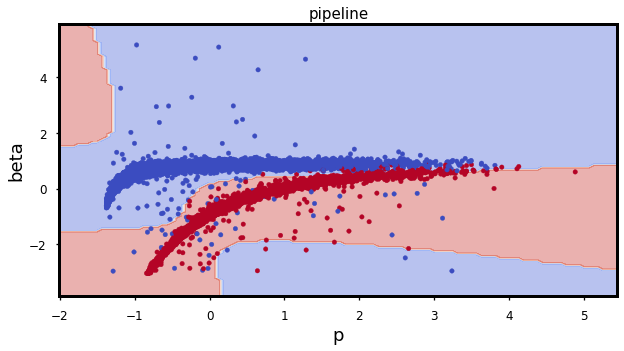

In [ ]:
'''
We can even put in the scaler in the pipeline.
'''

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDClassifier, Ridge
from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(data_prtcl.drop(['id'], axis=1) ,data_prtcl.id, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, random_state=0)

clf_pipeline= Pipeline([('scaler', StandardScaler() ),('p_transformer', PolynomialFeatures(degree = 3)), ('clf', SGDClassifier())])
clf_pipeline.fit(X_train, Y_train )
print(f'The acc. on training set is {clf_pipeline.score(X_train, Y_train):.02f}.\n')
print(f'The acc. on test set is {clf_pipeline.score(X_test, Y_test):.02f}.\n')


x1_list, x2_list = grid(X[:,0], X[:,1], n_points=100)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1 , xlabel = 'p', ylabel='beta', title = 'pipeline')
Y_grid = clf_pipeline.predict( X_grid ).reshape(x1_list.shape )

ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)
plt.show()

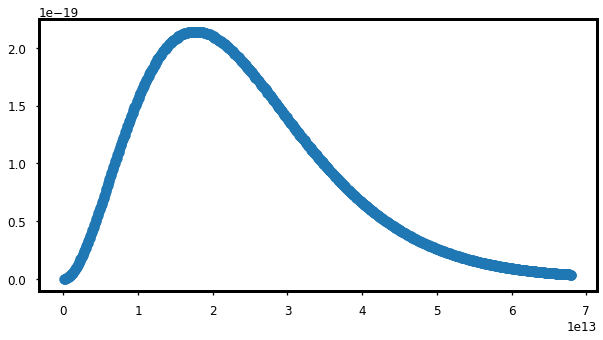

In [ ]:
'''
And now a regression example.
'''
X_bbr = data_bbr[['0']]
Y_bbr = data_bbr['T']

plt.scatter(X_bbr, Y_bbr)

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X_bbr , Y_bbr, random_state=0)

rg_pipeline= Pipeline([('scaler', StandardScaler() ),('p_transformer', PolynomialFeatures(degree = 3)), ('rg', Ridge())])
rg_pipeline.fit(X_train, Y_train )

from sklearn.metrics import mean_squared_error
print(f'The mse on training set is {mean_squared_error(Y_train, rg_pipeline.predict(X_train)):.02f}.\n')
print(f'The mse on test set is {mean_squared_error(Y_test, rg_pipeline.predict(X_test)):.02f}.\n')
print('Check and see if the Y_predicted == Y???')
print('Is this a good metric?')

The mse on training set is 0.00.

The mse on test set is 0.00.

Check and see if the Y_predicted == Y???
Is this a good metric?


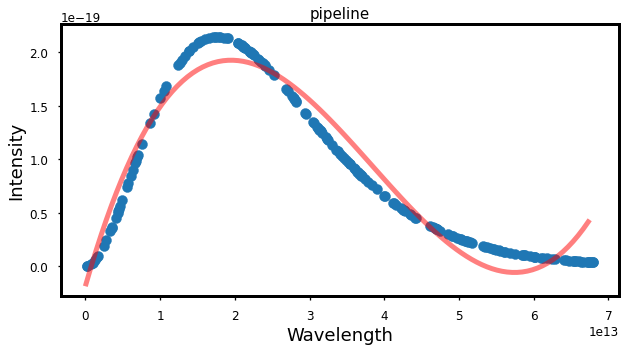

In [ ]:
x_range = np.arange(float(X_bbr.min(axis=0)), float(X_bbr.max(axis=0)), (float(X_bbr.max(axis=0)) - float(X_bbr.min(axis=0)))/100 ).reshape(-1,1)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1 , xlabel = 'Wavelength', ylabel='Intensity', title = 'pipeline')
plt.scatter(X_test, Y_test,label='actual test data')
plt.plot(x_range, rg_pipeline.predict(x_range), c='r', label='fit', alpha=.5)
plt.show()

# Non-linear techniques

## Decision Trees

Decision trees give a one of the most natural ways of classification.
See the cartoon below.


![DT](https://www.simplilearn.com/ice9/free_resources_article_thumb/decision-tree.JPG)

Image from https://www.simplilearn.com/ice9/free_resources_article_thumb/decision-tree.JPG

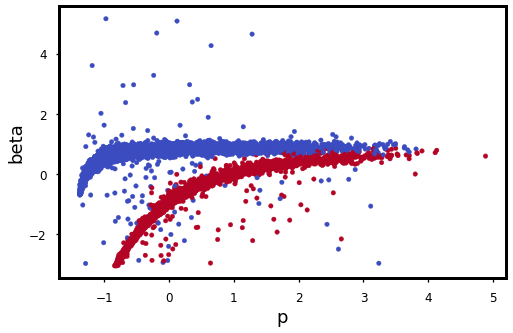

In [ ]:
#@title Data for Particle identification (Binary)


url = 'https://raw.githubusercontent.com/sraeisi/Machine_Learning_Physics_Winter20/master/Lec1/particle_mini.npz'
s=requests.get(url, stream=True).content
data=np.load(io.BytesIO(s) )


## If want to run locally
# data= np.load('particle_mini.npz')

X, Y = data['X'], data['Y']

from sklearn.preprocessing import scale
X = scale(X)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, random_state=0)

x_label='p'
y_label = 'beta'
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, xlabel = 'p', ylabel='beta')
ax.scatter(X[:,0], X[:,1], c= Y , cmap=plt.cm.coolwarm, s=20)

plt.show()

### Simple decision tree

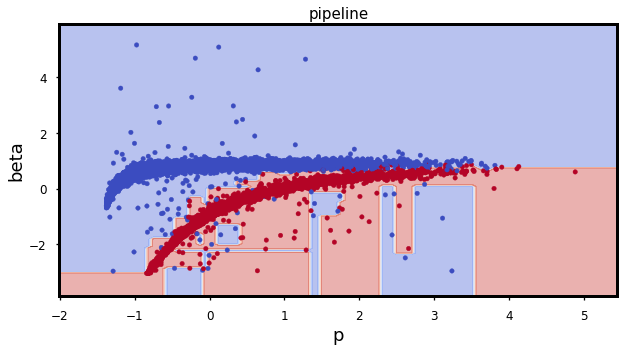

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
## Do the rest: Train the model, calculate the accuracy on the test and train data.
clf.fit(X, Y)
# Use the following code to plot it.

x1_list, x2_list = grid(X[:,0], X[:,1], n_points=100)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1 , xlabel = 'p', ylabel='beta', title = 'pipeline')
Y_grid = clf.predict( X_grid ).reshape(x1_list.shape )

ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)
plt.show()


### Depth of the tree

In [ ]:
%%time
clf_dict = {'Decision Tree with Max Depth 2' : DecisionTreeClassifier(max_depth=2).fit(X_train, Y_train),
           'Decision Tree with Max Depth 10' : DecisionTreeClassifier(max_depth=10).fit(X_train, Y_train),
           'Decision Tree with Max Depth 100' : DecisionTreeClassifier(max_depth=100).fit(X_train, Y_train)}

CPU times: user 38.8 ms, sys: 0 ns, total: 38.8 ms
Wall time: 42.1 ms


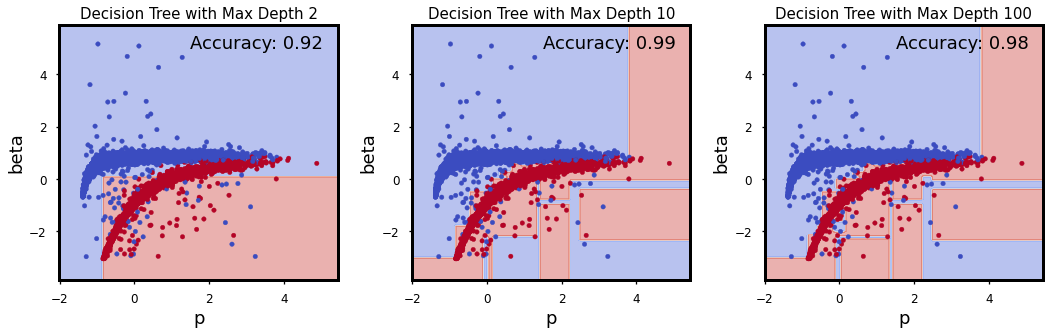

CPU times: user 1.07 s, sys: 202 ms, total: 1.28 s
Wall time: 1.07 s


In [ ]:
%%time
fig = plt.figure(figsize=(15,5))
for clf in list(clf_dict.keys())[:]:
    ax = fig.add_subplot(1, 3, list(clf_dict.keys()).index(clf)+1 , xlabel = x_label, ylabel=y_label, title = clf)
    clf = clf_dict[clf]

    X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
    Y_grid = clf.predict( X_grid ).reshape(x1_list.shape )

    ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
    ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)
    ax.text(1.5, 5, f'Accuracy: {clf.score( X_test , Y_test):.2f}')

plt.tight_layout()
plt.show()

# KNN

Another natural classification model is classification based on similar items, i.e. neighbors.

![knn](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png)

Image from http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png

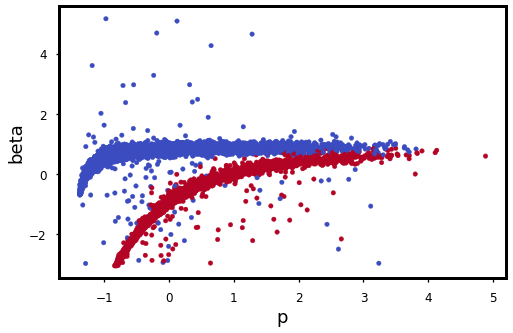

In [ ]:
#@title Data for Particle identification (Binary)


url = 'https://raw.githubusercontent.com/sraeisi/Machine_Learning_Physics_Winter20/master/Lec1/particle_mini.npz'
s=requests.get(url, stream=True).content
data=np.load(io.BytesIO(s) )


## If want to run locally
# data= np.load('particle_mini.npz')

X, Y = data['X'], data['Y']

from sklearn.preprocessing import scale
X = scale(X)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, random_state=0)

x_label='p'
y_label = 'beta'
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, xlabel = 'p', ylabel='beta')
ax.scatter(X[:,0], X[:,1], c= Y , cmap=plt.cm.coolwarm, s=20)

plt.show()

## Simple KNN classification

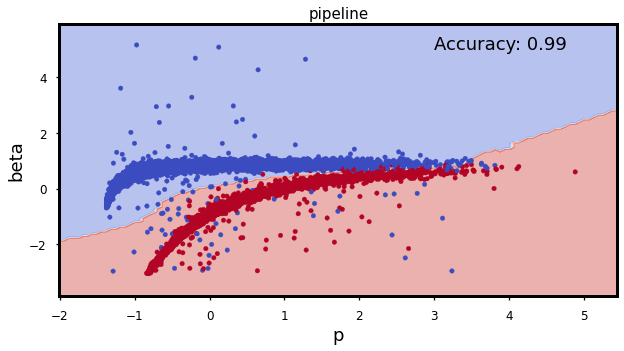

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## You do the rest!

##


x1_list, x2_list = grid(X[:,0], X[:,1], n_points=100)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1 , xlabel = 'p', ylabel='beta', title = 'pipeline')
Y_grid = clf.predict( X_grid ).reshape(x1_list.shape )

ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)
ax.text(3, 5, f'Accuracy: {clf.score( X_test , Y_test):.2f}')
plt.show()

## Number of neighbors

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier

clf_dict = {'KNN with k=3': KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train) ,
            'KNN with k=100': KNeighborsClassifier(n_neighbors=100).fit(X_train, Y_train),
            'KNN with k=1000': KNeighborsClassifier(n_neighbors=1000).fit(X_train, Y_train)}

CPU times: user 11.2 ms, sys: 0 ns, total: 11.2 ms
Wall time: 11.9 ms


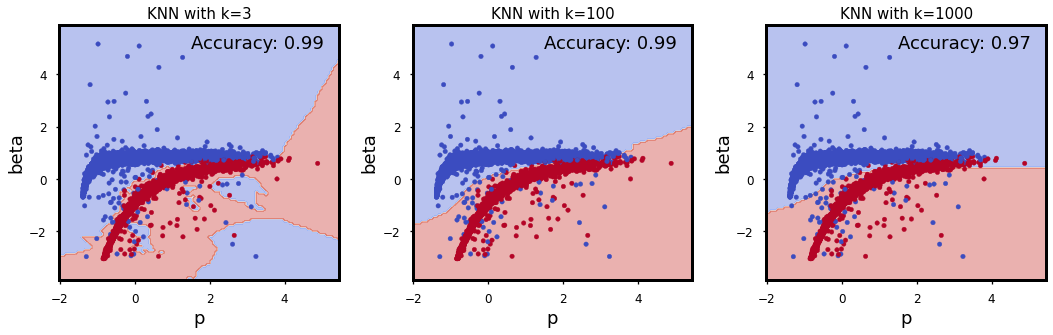

CPU times: user 6.46 s, sys: 158 ms, total: 6.62 s
Wall time: 6.43 s


In [ ]:
%%time
fig = plt.figure(figsize=(15,5))
for clf in list(clf_dict.keys())[:]:
    ax = fig.add_subplot(1, 3, list(clf_dict.keys()).index(clf)+1 , xlabel = x_label, ylabel=y_label, title = clf)
    clf = clf_dict[clf]

    X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
    Y_grid = clf.predict( X_grid ).reshape(x1_list.shape )

    ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
    ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)
    ax.text(1.5, 5, f'Accuracy: {clf.score( X_test , Y_test):.2f}')

plt.tight_layout()
plt.show()

# SVM

![SVM](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/440px-Kernel_Machine.svg.png)

Image from https://en.wikipedia.org/wiki/Support-vector_machine


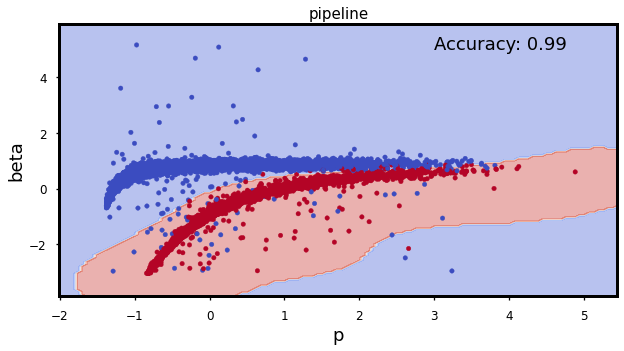

In [ ]:
from sklearn.svm import SVC

## You do the rest!


##


x1_list, x2_list = grid(X[:,0], X[:,1], n_points=100)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1 , xlabel = 'p', ylabel='beta', title = 'pipeline')
Y_grid = clf.predict( X_grid ).reshape(x1_list.shape )

ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)
ax.text(3, 5, f'Accuracy: {clf.score( X_test , Y_test):.2f}')
plt.show()

## Kernels

In [ ]:
%%time
from sklearn.svm import SVC

clf_dict = {'SVC with linear kernel': SVC(kernel='linear').fit(X_train, Y_train) ,
            'SVC with poly(d=3) kernel': SVC(kernel='poly', degree=3).fit(X_train, Y_train),
            'SVC with RBF kernel': SVC().fit(X_train, Y_train)}

CPU times: user 747 ms, sys: 11.1 ms, total: 758 ms
Wall time: 766 ms


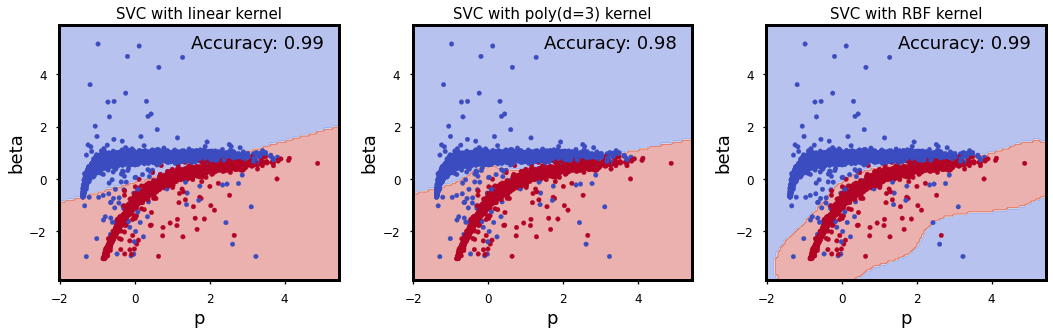

CPU times: user 1.55 s, sys: 213 ms, total: 1.77 s
Wall time: 1.54 s


In [ ]:
%%time
fig = plt.figure(figsize=(15,5))
for clf in list(clf_dict.keys())[:]:
    ax = fig.add_subplot(1, 3, list(clf_dict.keys()).index(clf)+1 , xlabel = x_label, ylabel=y_label, title = clf)
    clf = clf_dict[clf]

    X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
    Y_grid = clf.predict( X_grid ).reshape(x1_list.shape )

    ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
    ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)
    ax.text(1.5, 5, f'Accuracy: {clf.score( X_test , Y_test):.2f}')

plt.tight_layout()
plt.show()

In [ ]:
%%time
clf_dict = {'SVC with RBF kernel, gamma=.01': SVC(gamma=.01).fit(X_train, Y_train) ,
            'SVC with RBF kernel, gamma=1': SVC(gamma=1).fit(X_train, Y_train),
            'SVC with RBF kernel, gamma=10': SVC(gamma=10).fit(X_train, Y_train)}

CPU times: user 518 ms, sys: 3.79 ms, total: 522 ms
Wall time: 527 ms


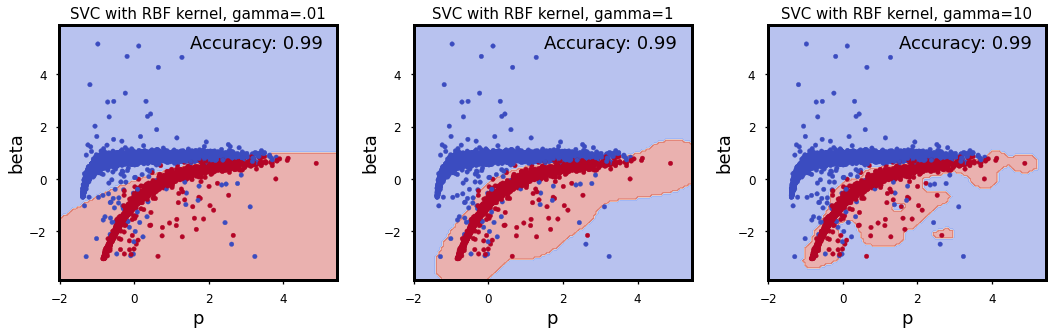

CPU times: user 1.75 s, sys: 144 ms, total: 1.89 s
Wall time: 1.75 s


In [ ]:
%%time
fig = plt.figure(figsize=(15,5))
for clf in list(clf_dict.keys())[:]:
    ax = fig.add_subplot(1, 3, list(clf_dict.keys()).index(clf)+1 , xlabel = x_label, ylabel=y_label, title = clf)
    clf = clf_dict[clf]

    X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T
    Y_grid = clf.predict( X_grid ).reshape(x1_list.shape )

    ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
    ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)
    ax.text(1.5, 5, f'Accuracy: {clf.score( X_test , Y_test):.2f}')

plt.tight_layout()
plt.show()

# Naive-Bayes

![NB](https://miro.medium.com/max/2000/1*ZW1icngckaSkivS0hXduIQ.jpeg)

Image from https://miro.medium.com/max/2000/1*ZW1icngckaSkivS0hXduIQ.jpeg

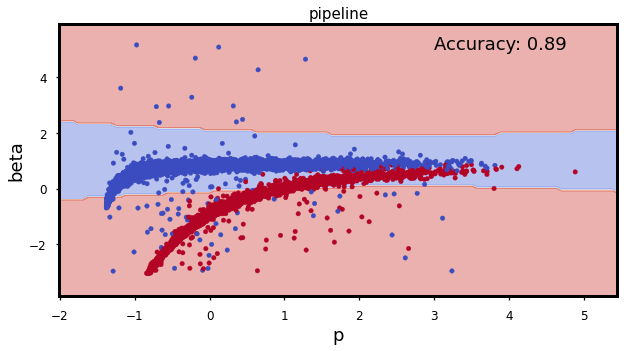

In [ ]:
from sklearn.naive_bayes import GaussianNB

## You do the rest!

##


x1_list, x2_list = grid(X[:,0], X[:,1], n_points=100)
X_grid = np.vstack([x1_list.reshape(-1),x2_list.reshape(-1)]).T

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1 , xlabel = 'p', ylabel='beta', title = 'pipeline')
Y_grid = clf.predict( X_grid ).reshape(x1_list.shape )

ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X.T, c=Y, cmap=plt.cm.coolwarm, s=20)
ax.text(3, 5, f'Accuracy: {clf.score( X_test , Y_test):.2f}')
plt.show()